<a href="https://colab.research.google.com/github/AndC314/Test_folder/blob/main/Practice_1_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [111]:
## dataset generation
X, y = make_friedman2(n_samples=200, noise=1, random_state=42)
df = pd.DataFrame(X, columns = ['Temperature','Energy','Torque','Gap'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
## model to use
lr = LinearRegression()

The dataset has been generated with an array of features X and the output y. 

The task is to:

1.   Create a simple linear model to predict y
2.   Evaluate feature importances
3. Improve the results


Some libraries are imported but feel free to use whatever you think is best.


Fit the model on train dataset and calculate score (R2) on test dataset. The score on training is slighty higher than test set, as expected since the model has been created with that data. However the model seems to generalize well on test set.

# 1 Create model to predict y

In [112]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8785474009945631, 0.8477565001755369)

In [113]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

# 2 Evaluate feature importances

In order to see the coefficients (feature importances) of the linear regression we plot them using lr.coef_ (with dir(lr) we find all possible attributes and method of the class LinearRegression)

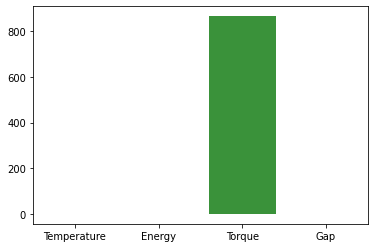

In [114]:
sns.barplot(x=list(df), y=lr.coef_);

The coefficients are relative to the original scale. Another way to see the results is to scale every variable down to the same range, a possibility is using standardscaler.

In [115]:
sc = StandardScaler()
X_std = sc.fit_transform(X_train)
X_tstd = sc.transform(X_test)

In [116]:
lr.fit(X_std, y_train)
lr.score(X_tstd, y_test)

0.8477565001755367

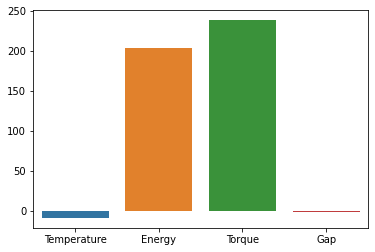

In [117]:
sns.barplot(x=list(df), y=lr.coef_)

It is clear now that Energy and Torque are by far the most important features, while Temperature and Gap have marginal contribution.

# 3. Improve the result

to improve the result we can try to add some non linear features: for example the interactions between the variables: Temperature * Energy and so on.

In [155]:
df = pd.DataFrame(X, columns = ['Temperature','Energy','Torque','Gap'])
df['1^2'] = df['Temperature']*df['Temperature']
df['1-2'] = df['Temperature']*df['Energy']
df['2-3'] = df['Energy']*df['Torque']
df.head()

,Temperature,Energy,Torque,Gap,1^2,1-2,2-3
0,37.454012,1678.777388,0.731994,6.986585,1402.803006,62876.948246,1228.854878
1,15.601864,380.500750,0.058084,9.661761,243.418162,5936.520978,22.100858
2,60.111501,1282.391023,0.020584,10.699099,3613.392573,77086.449462,26.397371
3,83.244264,472.546861,0.181825,2.834045,6929.607502,39336.815690,85.920818
4,30.424224,982.920600,0.431945,3.912291,925.633424,29904.596812,424.567657


In [156]:

# in order to check if the model can generalize well, we must split it in train and test set
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df, y, random_state=42, test_size=0.4) 
X_std_p = sc.fit_transform(X_train_p)
X_tstd_p = sc.transform(X_test_p)

In [157]:
lr.fit(X_std_p, y_train)
lr.score(X_std_p, y_train), lr.score(X_tstd_p, y_test)

(0.999631123388862, 0.9996738926737754)

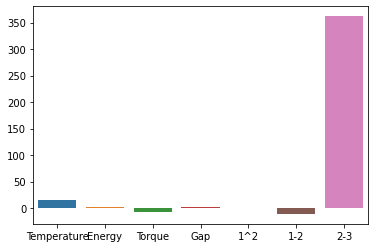

In [158]:
sns.barplot(x=list(df), y=lr.coef_)

## another option with arrays instead of dataframe

In [159]:
X.shape

(200, 4)

In [160]:
x02 = X[:,1]*X[:,2]
X2 = np.c_[X,x02]
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42, test_size=0.4)
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9995062182445175, 0.9996898686470198)